# **1. Histogram Citra**

Histogram citra menggambarkan distribusi intensitas pixel dalam sebuah gambar grayscale. Berikut langkah-langkahnya:

1. Baca gambar dan ubah menjadi grayscale.
2. Hitung histogram menggunakan OpenCV.
3. Normalisasi histogram agar nilai berada pada rentang tertentu.
4. Visualisasi menggunakan Matplotlib.

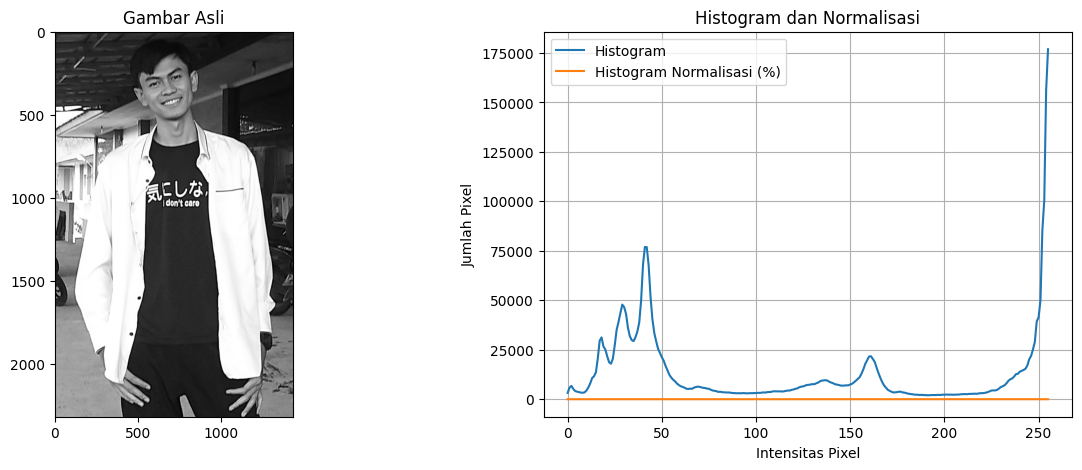

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dan ubah ke grayscale
image = cv2.imread('20221116_165328.jpg', cv2.IMREAD_GRAYSCALE)

# Hitung histogram menggunakan OpenCV
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Normalisasi histogram
hist_normalized = hist / hist.sum()

# Tampilkan gambar asli dan histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Histogram dan Normalisasi")
plt.plot(hist, label="Histogram")
plt.plot(hist_normalized * 100, label="Histogram Normalisasi (%)")
plt.legend()
plt.xlabel("Intensitas Pixel")
plt.ylabel("Jumlah Pixel")
plt.grid()
plt.show()


1. **Impor Library**: Menggunakan cv2 untuk operasi citra, numpy untuk perhitungan matematis, dan matplotlib.pyplot untuk visualisasi.

2. **Membaca Gambar**: Gambar dibaca dalam mode grayscale menggunakan cv2.imread().

3. **Histogram**: Histogram intensitas pixel dihitung menggunakan cv2.calcHist(), yang menghitung jumlah pixel untuk setiap nilai intensitas (0-255).

4. **Normalisasi**: Histogram dinormalisasi dengan membagi setiap nilai dengan jumlah total pixel, menghasilkan distribusi probabilitas.

5. **Visualisasi**:
   - Subplot pertama menampilkan gambar asli.
   - Subplot kedua menampilkan histogram asli dan histogram normalisasi (dalam persentase), dilengkapi grid, legenda, dan label.

Hasil:
- Gambar grayscale dan grafik histogram yang menunjukkan distribusi intensitas pixel.

# **2. Operasi Konvolusi dengan Kernel Sederhana**

Operasi konvolusi menggunakan kernel rata-rata 3x3 akan menghaluskan gambar (blur). Berikut langkah-langkahnya:

1. Tentukan kernel rata-rata 3x3.
2. Terapkan konvolusi menggunakan OpenCV (cv2.filter2D).
3. Bandingkan citra asli dengan hasil konvolusi.

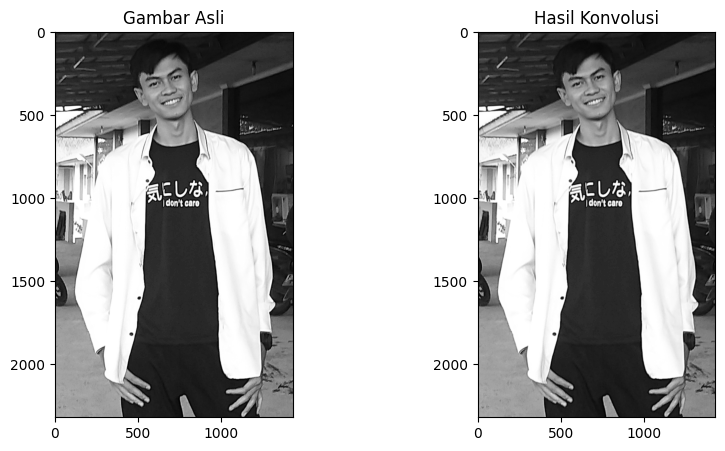

In [3]:
# Buat kernel rata-rata 3x3
kernel = np.ones((3, 3), np.float32) / 9

# Lakukan operasi konvolusi
convolved_image = cv2.filter2D(image, -1, kernel)

# Tampilkan gambar asli dan hasil konvolusi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Hasil Konvolusi")
plt.imshow(convolved_image, cmap='gray')
plt.show()

1. Kernel Rata-Rata 3x3:
   - Kernel 3x3 adalah matriks berisi nilai rata-rata \( \frac{1}{9} \), digunakan untuk menghaluskan (blur) gambar.
   - Efek ini mengurangi detail tinggi, seperti noise atau tepi tajam, menghasilkan gambar yang lebih halus.

2. Operasi Konvolusi:
   - Fungsi cv2.filter2D() menerapkan kernel ke seluruh gambar. Setiap pixel hasil adalah rata-rata intensitas pixel di sekitarnya berdasarkan kernel.

3. Hasil Visualisasi:
   - **Gambar Asli**: Memiliki detail tepi yang tajam dan tekstur lebih terlihat.
   - **Hasil Konvolusi**: Gambar terlihat lebih halus karena detail kecil seperti noise berkurang.

**Kesimpulan:**
Operasi konvolusi dengan kernel rata-rata efektif untuk smoothing (penghalusan), tetapi bisa menyebabkan kehilangan detail pada tepi gambar.

# **3. Transformasi Fourier**

Transformasi Fourier digunakan untuk menganalisis frekuensi dalam citra. Langkah-langkah:

1. Terapkan Transformasi Fourier dengan np.fft.fft2.
2. Hitung magnitudo spektrum.
3. Rekonstruksi citra dari hasil inversi Fourier.

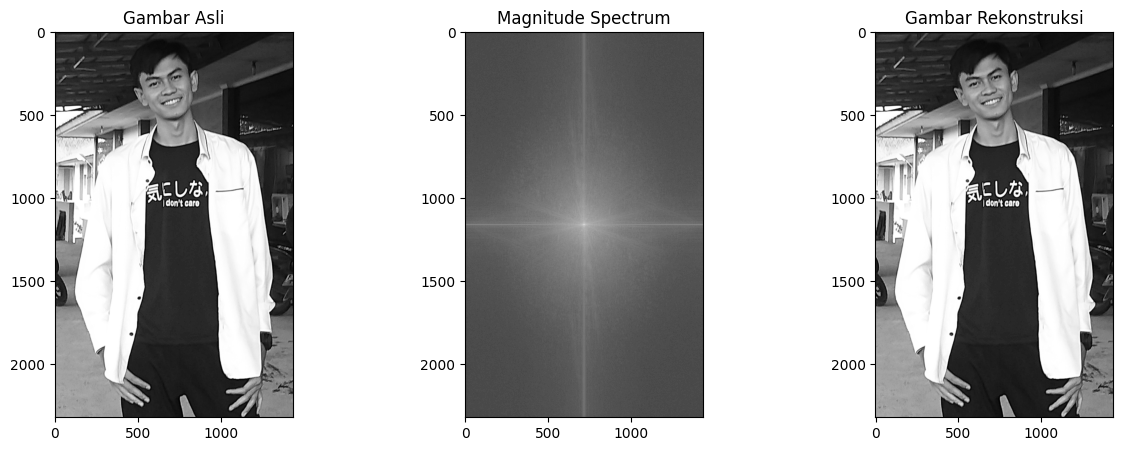

In [4]:
# Transformasi Fourier
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)

# Inversi Transformasi Fourier
inverse_dft_shift = np.fft.ifftshift(dft_shift)
image_reconstructed = np.fft.ifft2(inverse_dft_shift)
image_reconstructed = np.abs(image_reconstructed)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Gambar Asli")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Gambar Rekonstruksi")
plt.imshow(image_reconstructed, cmap='gray')
plt.show()


1. **Transformasi Fourier:**
   - Kode menggunakan np.fft.fft2 untuk melakukan transformasi Fourier 2D pada gambar. Transformasi ini mengubah domain spasial (gambar) menjadi domain frekuensi.
   - np.fft.fftshift digunakan untuk memindahkan frekuensi nol ke tengah spektrum agar lebih mudah dianalisis.
   - Magnitude spectrum dihitung sebagai \( \log(1 + |F(u,v)|) \), yang menunjukkan intensitas frekuensi.

2. **Inversi Transformasi Fourier:**
   - np.fft.ifftshift memindahkan frekuensi kembali ke posisi aslinya.
   - np.fft.ifft2 mengembalikan citra dari domain frekuensi ke domain spasial.
   - Gambar hasil rekonstruksi dihitung dengan mengambil nilai absolut untuk memastikan nilainya valid.

3. **Visualisasi:**
   - **Gambar Asli**: Gambar grayscale dalam domain spasial.
   - **Magnitude Spectrum**: Menunjukkan distribusi komponen frekuensi pada gambar.
     - Pusat spektrum berisi frekuensi rendah (struktur besar).
     - Frekuensi tinggi (tepi tajam dan detail) berada di area pinggir.
   - **Gambar Rekonstruksi**: Gambar hasil inversi transformasi Fourier yang menyerupai gambar asli.

**Informasi dari Magnitude Spectrum:**
- Magnitude spectrum memberikan wawasan tentang karakteristik frekuensi pada gambar.
- Frekuensi rendah dominan pada gambar dengan pola atau warna seragam, sementara frekuensi tinggi dominan pada gambar dengan detail atau tepi tajam.
- Spektrum ini berguna untuk analisis filter, kompresi, atau penghapusan noise.

#**4. Operasi Aritmatika Citra (Pencerahan)**

Operasi pencerahan menambahkan nilai konstan ke setiap pixel. Langkah-langkah:

1. Tambahkan nilai konstan ke citra.
2. Pastikan nilai pixel tidak melebihi 255 dengan menggunakan clipping.
3. Visualisasikan hasilnya.

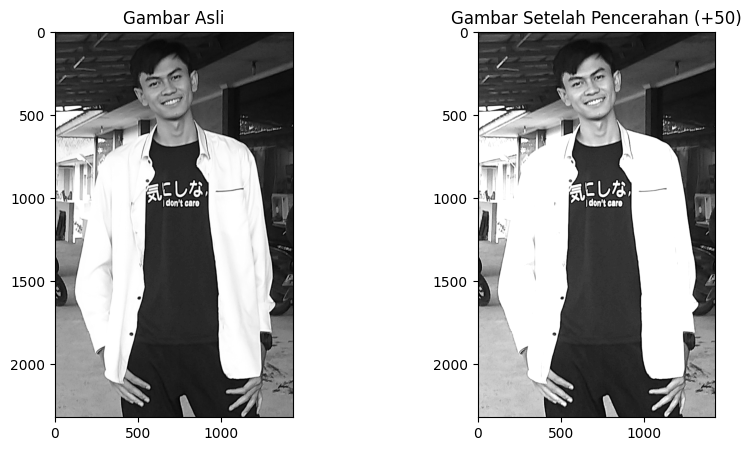

In [5]:
# Operasi pencerahan
brightness_value = 50
brightened_image = cv2.add(image, brightness_value)

# Tampilkan gambar asli dan hasil pencerahan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f"Gambar Setelah Pencerahan (+{brightness_value})")
plt.imshow(brightened_image, cmap='gray')
plt.show()


**Perubahan yang Terjadi Setelah Pencerahan:**

1. **Penambahan Nilai Intensitas:**  
   - Operasi pencerahan menambahkan nilai intensitas sebesar \(+50\) ke setiap piksel pada gambar asli. Ini membuat citra secara keseluruhan tampak lebih terang.

2. **Efek Visual:**
   - Bagian terang pada gambar (seperti baju putih) menjadi lebih cerah, mendekati putih maksimal.
   - Bagian gelap (seperti bayangan atau baju hitam) juga mengalami peningkatan intensitas, tetapi perubahan ini lebih kecil dibandingkan area terang karena mendekati batas maksimum intensitas (255).

3. **Keterangan Histogram:**  
   - Pencerahan akan menggeser histogram gambar ke kanan karena seluruh intensitas piksel meningkat.

4. **Keterbatasan:**
   - Jika nilai intensitas mencapai maksimum (255), beberapa detail mungkin hilang karena terjadi saturasi, sehingga informasi pada area tersebut tidak dapat dibedakan lagi.

Operasi ini sering digunakan untuk meningkatkan visibilitas pada citra gelap atau underexposed.